<a href="https://colab.research.google.com/github/timothylombard/RSB/blob/master/RSB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
link = 'https://raw.githubusercontent.com/timothylombard/RSB/master/RSBdata.csv'

In [0]:
df = pd.read_csv(link)

In [72]:
print(df)

         Date  Placed  Total Components  ...  Target_Ship  Target_Cost    DesignName
0  2017-01-01       0              2946  ...      11/1/17         9000  Abc_CPU_Main
1  2017-01-04    1432              2946  ...      11/1/17         9000  Abc_CPU_Main
2  2017-01-07    2946              2946  ...      11/1/17         9000  Abc_CPU_Main
3  2017-01-10    2946              2946  ...      11/1/17         9000  Abc_CPU_Main
4  2017-01-13    2247              3588  ...      18/1/17        12500  Abc_CPU_Main
5  2017-01-16    3588              3588  ...      18/1/17        12500  Abc_CPU_Main
6  2017-01-18    3588              3588  ...      18/1/17        12500  Abc_CPU_Main

[7 rows x 12 columns]


In [73]:
df['Date'] =  pd.to_datetime(df['Date'])
print(df)

        Date  Placed  Total Components  ...  Target_Ship  Target_Cost    DesignName
0 2017-01-01       0              2946  ...      11/1/17         9000  Abc_CPU_Main
1 2017-01-04    1432              2946  ...      11/1/17         9000  Abc_CPU_Main
2 2017-01-07    2946              2946  ...      11/1/17         9000  Abc_CPU_Main
3 2017-01-10    2946              2946  ...      11/1/17         9000  Abc_CPU_Main
4 2017-01-13    2247              3588  ...      18/1/17        12500  Abc_CPU_Main
5 2017-01-16    3588              3588  ...      18/1/17        12500  Abc_CPU_Main
6 2017-01-18    3588              3588  ...      18/1/17        12500  Abc_CPU_Main

[7 rows x 12 columns]


In [0]:
df.set_index('Date', inplace=True)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()


In [0]:
df['pctConn'] = df['Connected']/df['Connections']
df['pctPlaced'] = df['Placed']/df['Total Components']


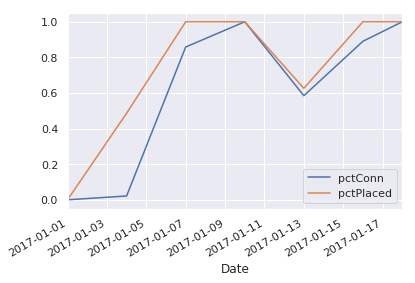

In [94]:
df[['pctConn','pctPlaced']].plot();

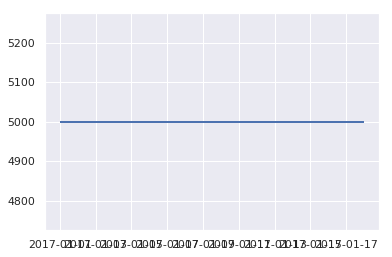

In [65]:
df.index.max()

Timestamp('2017-01-18 00:00:00')